# 데이터 전처리

In [1]:
#데이터 분석을 위한 자료구조 와 선형대수
import numpy as np

#데이터 분석을 위한 자료구조 와 전처리 및 시각화
import pandas as pd

#시각화 패키지
import matplotlib.pyplot as plt

#시각화 할 때 한글을 출력할 수 있도록 하기 위해서
import platform
from matplotlib import font_manager, rc

#한글 처리
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(
        fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#그래프에서 음수를 위한 처리
import matplotlib

matplotlib.rcParams['axes.unicode_minus']
    
#고급 시각화 와 기본 데이터 제공
import seaborn as sns

#데이터 전처리 와 머신러닝 알고리즘 제공
import sklearn 

## 시계열 데이터 - 시간에 따라 변하는 데이터

### 문자열을 datetime64로 변환

In [5]:
date_string = np.array(['03-04-2005 11:35 PM',
                       '23-05-2010 12:01 AM', 
                       '04-09-2009 11:35 TM'])

#에러가 발생하면 무시하고 변환
#에러가 발생한 경우는 문자열 그대로 리턴
#이런 경우 python 의 list는 그대로 지만 
#numpy 나 pandas 의 자료구조로 변환하면 전부 문자열이 되버립니다.
'''
print([pd.to_datetime(date,
            format = '%d-%m-%Y %I:%M %p', errors='ignore') 
      for date in date_string])
'''

#변경이 안되는 값을 없는 값의 형태인 NaT로 변환
'''
print([pd.to_datetime(date,
            format = '%d-%m-%Y %I:%M %p', errors='coerce') 
      for date in date_string])
'''

#예외를 발생 시킴
print([pd.to_datetime(date,
            format = '%d-%m-%Y %I:%M %p', errors='raise') 
      for date in date_string])

ValueError: time data '04-09-2009 11:35 TM' does not match format '%d-%m-%Y %I:%M %p' (match)

### period: 날짜를 일정한 간격 단위로 변환

In [8]:
date_string = np.array(['03-04-2005',
                       '23-05-2006', 
                       '04-09-2007'])

dates = pd.to_datetime(date_string,
                       format = '%d-%m-%Y')
print(dates)

#일정한 주기의 데이터로 변환
pr_days = dates.to_period(freq='D')
print(pr_days)

pr_days = dates.to_period(freq='M')
print(pr_days)

pr_days = dates.to_period(freq='A')
print(pr_days)



DatetimeIndex(['2005-04-03', '2006-05-23', '2007-09-04'], dtype='datetime64[ns]', freq=None)
PeriodIndex(['2005-04-03', '2006-05-23', '2007-09-04'], dtype='period[D]')
PeriodIndex(['2005-04', '2006-05', '2007-09'], dtype='period[M]')
PeriodIndex(['2005', '2006', '2007'], dtype='period[A-DEC]')


### 시계열 데이터의 생성

In [11]:
#월 별로 12개 생성
ts_ms = pd.date_range(start='2021-01-01', end=None, 
                     periods=12, freq='MS')
print(ts_ms)
print()


#분기 별로 12개 생성
ts_ms = pd.date_range(start='2021-01-01', end=None, 
                     periods=12, freq='Q')
print(ts_ms)
print()

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', freq='MS')

DatetimeIndex(['2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31',
               '2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')



### 년월일 분리

In [15]:
#stock-data.csv 파일의 데이터를 읽어오기
df = pd.read_csv('./data/stock-data.csv')
df.info()
#Date 의 열의 데이터를 날짜로 변경해서 새로운 열로 추가
df['newDate'] = pd.to_datetime(df['Date'])
df.info()

#년도 와 요일 분리
df['Year'] = df['newDate'].dt.year
df['WeekNum'] = df['newDate'].dt.weekday
df['WeekName'] = df['newDate'].dt.day_name()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     20 non-null     object        
 1   Close    20 non-null     int64         
 2   Start    20 non-null     int64         
 3   High     20 non-null     int64         
 4   Low      20 non-null     int64         
 5   Volume   20 non-null     int64         
 6   newDate  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory

,Date,Close,Start,High,Low,Volume,newDate,Year,WeekNum,WeekName
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,0,Monday
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,4,Friday
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,3,Thursday
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,2,Wednesday
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,1,Tuesday


### shift - 이동시켜서 시차 특성을 갖는 데이터를 생성

In [19]:
# 파이썬이 제공하는 날짜 데이터 모듈
from datetime import datetime

#파이썬의 날짜 형식으로 데이터 생성
dates = [datetime(2021, 1, 1), datetime(2021, 1, 4),
        datetime(2021, 1, 5), datetime(2021, 1, 6), 
        datetime(2021, 1, 7), datetime(2021, 1, 8), 
        datetime(2021, 1, 11), datetime(2021, 1, 12)]

#날짜 데이터를 인덱스로 해서 8개의 데이터를 랜덤하게 생성
ts = pd.Series(np.random.randn(8), index=dates)
print(ts)
print()

#하나씩 밀려서 데이터가 대입됩니다.
print(ts.shift(1))

print()

#하나씩 당겨서 데이터가 대입됩니다.
print(ts.shift(-1))


2021-01-01   -0.800956
2021-01-04    0.206029
2021-01-05   -0.084236
2021-01-06   -1.224147
2021-01-07    1.542806
2021-01-08    0.186201
2021-01-11    1.000742
2021-01-12   -0.148362
dtype: float64

2021-01-01         NaN
2021-01-04   -0.800956
2021-01-05    0.206029
2021-01-06   -0.084236
2021-01-07   -1.224147
2021-01-08    1.542806
2021-01-11    0.186201
2021-01-12    1.000742
dtype: float64

2021-01-01    0.206029
2021-01-04   -0.084236
2021-01-05   -1.224147
2021-01-06    1.542806
2021-01-07    0.186201
2021-01-08    1.000742
2021-01-11   -0.148362
2021-01-12         NaN
dtype: float64


### 이동 시간 윈도우 - 시계열의 간격을 옮겨가면서 작업

In [26]:
time_index = pd.date_range('01/01/2022', periods=12, freq='MS')
dataframe = pd.DataFrame(index = time_index)
dataframe['stockprice'] = [1,2,3,4,5,6,7,8,9,10,11,12]
#print(dataframe)

#단순 이동 평균 - 이전 데이터 와 현재 데이터의 가중치가 동일
print(dataframe.rolling(window=3).mean())


#지수 이동 평균 - 이전 데이터의 가중치를 줄여서 반영
print(dataframe.ewm(span=3).mean())

            stockprice
2022-01-01         NaN
2022-02-01         NaN
2022-03-01         2.0
2022-04-01         3.0
2022-05-01         4.0
2022-06-01         5.0
2022-07-01         6.0
2022-08-01         7.0
2022-09-01         8.0
2022-10-01         9.0
2022-11-01        10.0
2022-12-01        11.0
            stockprice
2022-01-01    1.000000
2022-02-01    1.666667
2022-03-01    2.428571
2022-04-01    3.266667
2022-05-01    4.161290
2022-06-01    5.095238
2022-07-01    6.055118
2022-08-01    7.031373
2022-09-01    8.017613
2022-10-01    9.009775
2022-11-01   10.005374
2022-12-01   11.002930


### 결측치 대체

In [35]:
time_index = pd.date_range("01/01/2022", periods=7, freq="D")
dataframe = pd.DataFrame(index=time_index)
dataframe['price'] = [1000,2000,4000, np.nan, 5000, np.nan, 7000]
#print(dataframe)

#앞쪽 데이터를 이용해서 채우기
dataframe.ffill()

#누락된 값을 선형 보간 합니다.
#변화량의 단순 평균을 적용
dataframe.interpolate()

#누락된 값을 비선형 보간 합니다.
#변화량에 곡선을 적용하기 때문에 최근의 데이터가 조금 더 반영
dataframe.interpolate(method="quadratic")

,price
2022-01-01,1000.0
2022-01-02,2000.0
2022-01-03,4000.0
2022-01-04,4500.0
2022-01-05,5000.0
2022-01-06,6000.0
2022-01-07,7000.0


### resampling - 데이터의 빈도를 변경하는 것

In [46]:
#데이터를 2분 단위로 생성
time_index = pd.date_range(
    '2022-02-21', '2022-02-22', freq='2min')
df = pd.DataFrame(index=time_index)[:100]
df['price'] = np.random.randint(low=10, high=100, size=100)
#print(df.head())

#데이터를 10분 단위로 변경
df['price'].resample('10T').first()

#10분 단위 합계
df['price'].resample('10T').sum()


#데이터를 2개만 생성
time_idx = pd.date_range('1/1/2022', periods=2, freq='M')
ts = pd.Series(np.arange(2), index=time_idx)
ts

# 업 샘플링
ts.resample('W').ffill()

2022-02-06    0
2022-02-13    0
2022-02-20    0
2022-02-27    0
2022-03-06    1
Freq: W-SUN, dtype: int32

### 계절성 데이터

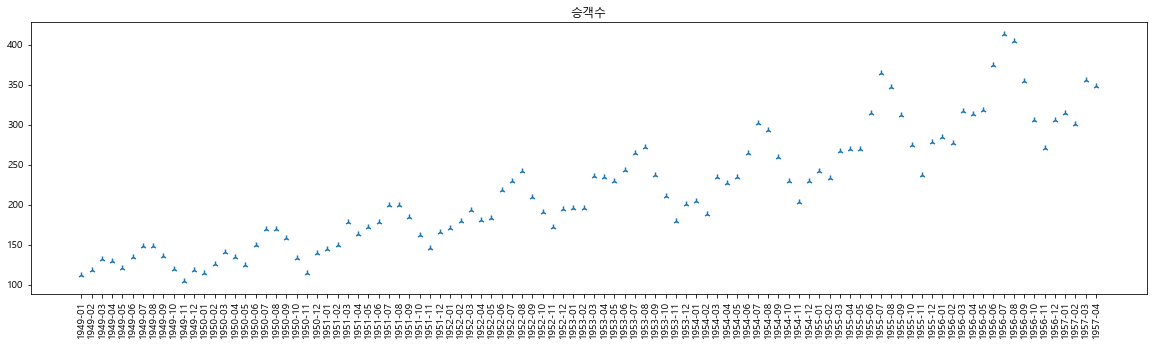

In [51]:
#데이터 가져오기
air = pd.read_csv('./data/AirPassengers.csv', 
                 names = ['Date', 'Passengers'])
air

#산점도 그리기 - 계절성 데이터를 파악하기가 어려움
plt.figure(figsize=(20, 5))
plt.scatter(x=air['Date'][0:100], y=air['Passengers'][0:100],
            marker='2')
plt.xticks(size=10, rotation='vertical')
plt.title('승객수')
plt.show()

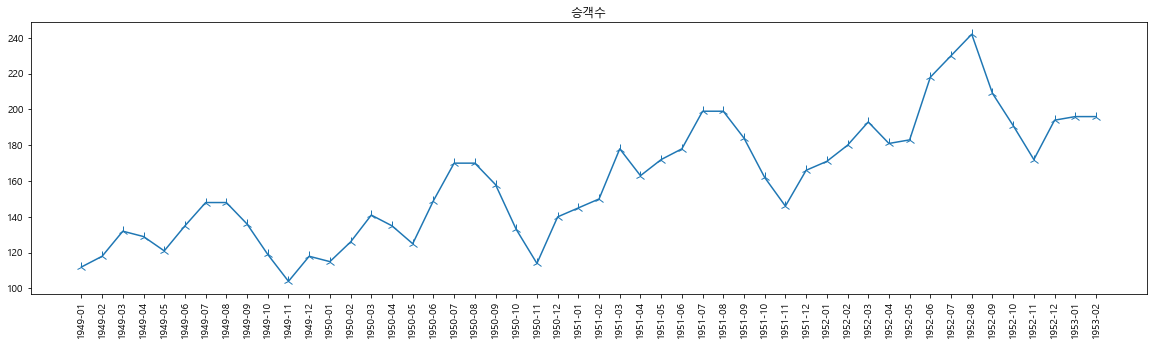

In [54]:
#꺽은선 그래프 그리기 - 계절성 데이터를 파악하기가 어려움
plt.figure(figsize=(20, 5))
plt.plot(air['Date'][0:50], air['Passengers'][0:50],
            marker='2', markersize=10)
plt.xticks(size=10, rotation='vertical')
plt.title('승객수')
plt.show()

## 한글 형태소 분석

### konlpy를 이용한 한글 형태소 분석

In [59]:
text = '태양계는 지금으로부터 약 46억 년전 거대한 분자 구름의 일부분이 중력 붕괴를 일으키면서 형성되었다.'

#단어 단위로 분할해주는 함수
from nltk import word_tokenize
print(word_tokenize(text))

#한글 형태소 분석
from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.sentences(text))
#단어 단위로 분할
print(kkma.nouns(text))
#품사와 함께 태깅
print(kkma.pos(text))

print()
from konlpy.tag import Hannanum
hannanum = Hannanum()
print(hannanum.nouns(text))
print(hannanum.pos(text))
print(hannanum.morphs(text))


print()
from konlpy.tag import Okt
okt = Okt()
print(okt.nouns(text))
print(okt.pos(text))
print(okt.morphs(text))

['태양계는', '지금으로부터', '약', '46억', '년전', '거대한', '분자', '구름의', '일부분이', '중력', '붕괴를', '일으키면서', '형성되었다', '.']
['태양계는 지금으로부터 약 46억 년 전 거대한 분자 구름의 일부분이 중력 붕괴를 일으키면서 형성되었다.']
['태양계', '지금', '46', '46억', '억', '년', '년전', '전', '거대', '분자', '구름', '일부분', '중력', '붕괴', '형성']
[('태양계', 'NNG'), ('는', 'JX'), ('지금', 'NNG'), ('으로', 'JKM'), ('부터', 'JX'), ('약', 'MDN'), ('46', 'NR'), ('억', 'NR'), ('년', 'NNB'), ('전', 'NNG'), ('거대', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('분자', 'NNG'), ('구름', 'NNG'), ('의', 'JKG'), ('일부분', 'NNG'), ('이', 'JKS'), ('중력', 'NNG'), ('붕괴', 'NNG'), ('를', 'JKO'), ('일으키', 'VV'), ('면서', 'ECE'), ('형성', 'NNG'), ('되', 'XSV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]

['태양계', '지금', '약', '46억', '년', '거대', '자', '구름', '일부분', '중력', '붕괴', '형성']
[('태양계', 'N'), ('는', 'J'), ('지금', 'N'), ('으로부터', 'J'), ('약', 'N'), ('46억', 'N'), ('년', 'N'), ('전', 'X'), ('거대', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('불', 'P'), ('ㄴ', 'E'), ('자', 'N'), ('구름', 'N'), ('의', 'J'), ('일부분', 'N'), ('이', 'J'), ('중력', 'N'), ('붕괴', 'N'), ('를', 'J'), (

# Opev CV

## 설치 확인

In [60]:
import cv2
cv2.__version__

'4.5.5'

## 윈도우 생성 및 출력

In [62]:
import numpy as np
import cv2

#윈도우에 출력할 데이터 생성
image = np.zeros((200, 400), np.uint8)
image [:] = 200

#윈도우 생성
cv2.namedWindow('window', cv2.WINDOW_AUTOSIZE)

#윈도우 출력
cv2.imshow('window', image)

#키보드 입력 대기
cv2.waitKey(0)

#윈도우 종료
cv2.destroyAllWindows()

## 이벤트 처리

### 키보드 이벤트

In [2]:
import numpy as np
import cv2

#ord 함수는 2byte 문자의 앞부분만 추출해서 1byte ascii code로 만들어주는 함수
switch_case = {ord('a'):'a키 입력', ord('b'):"b키 입력"}

image = np.ones((200, 300), np.float64)
cv2.namedWindow('Keyboard Event')
cv2.imshow('Keyboard Event', image)

while True:
    #키보드 입력 대기
    key = cv2.waitKey(0)
    print(key)
    if key == 27:
        break
    try:
        result = switch_case[key]
        print(result)
    except:
        result = -1
        
cv2.destroyAllWindows()

101
13
32
0
0
0
0
108
111
107
112
117
117
103
27


### 마우스 이벤트

In [4]:
import numpy as np
import cv2

image = np.ones((200, 300), np.float64)
cv2.namedWindow('Mouse Event')
cv2.imshow('Mouse Event', image)

def onMouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(event)
        print(flags)
        print(x, ":", y)
    
cv2.setMouseCallback('Mouse Event', onMouse)
    
cv2.waitKey(0)        
cv2.destroyAllWindows()

1
1
211 : 83
1
1
61 : 137
1
17
125 : 101
1
25
130 : 92
